In [232]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score ,mean_absolute_error,classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier



## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [234]:
df = pd.read_csv("C:/Users/ohoud/OneDrive/Desktop/Tuwaiq/Usecase-7/final_data.csv")  

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [236]:
df.head()

player               team  \
0        /david-de-gea/profil/spieler/59377  Manchester United   
1       /jack-butland/profil/spieler/128899  Manchester United   
2          /tom-heaton/profil/spieler/34130  Manchester United   
3  /lisandro-martinez/profil/spieler/480762  Manchester United   
4     /raphael-varane/profil/spieler/164770  Manchester United   

                name              position  height   age  appearance  \
0       David de Gea            Goalkeeper   189.0  32.0         104   
1       Jack Butland            Goalkeeper   196.0  30.0          15   
2         Tom Heaton            Goalkeeper   188.0  37.0           4   
3  Lisandro Martínez  Defender Centre-Back   175.0  25.0          82   
4     Raphaël Varane  Defender Centre-Back   191.0  30.0          63   

      goals   assists  yellow cards  ...  goals conceded  clean sheets  \
0  0.000000  0.000000      0.009585  ...        1.217252      0.335463   
1  0.000000  0.000000      0.069018  ...        1.242331      0.207055   
2  0.000000  0.000000      0.000000  ...        0.616438      0.924658   
3  0.028090  0.056180      0.224719  ...        0.000000      0.000000   
4  0.017889  0.017889      0.053667  ...        0.000000      0.000000   

   minutes played  days_injured  games_injured  award  current_value  \
0            9390            42              5     13       15000000   
1            1304           510             58      1        1500000   
2             292           697             84      4         600000   
3            6408           175             22      9       50000000   
4            5031           238             51     21       40000000   

   highest_value  position_encoded  winger  
0       70000000                 1       0  
1       22000000                 1       0  
2        6000000                 1       0  
3       50000000                 2       0  
4       80000000                 2       0  

[5 rows x 22 columns]

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [238]:
df.shape

(10754, 22)

In [239]:
df.describe()

height           age    appearance         goals       assists  \
count  10754.000000  10754.000000  10754.000000  10754.000000  10754.000000   
mean     181.240353     26.041903     36.407011      0.125554      0.086978   
std        6.969818      4.777629     26.526541      0.235585      0.143351   
min      156.000000     15.000000      0.000000      0.000000      0.000000   
25%      176.000000     22.000000     12.000000      0.000000      0.000000   
50%      181.240353     26.000000     35.000000      0.045969      0.040773   
75%      186.000000     29.000000     59.000000      0.172263      0.133136   
max      206.000000     43.000000    107.000000     11.250000      4.000000   

       yellow cards  second yellow cards     red cards  goals conceded  \
count  10754.000000         10754.000000  10754.000000    10754.000000   
mean       0.189757             0.004666      0.006826        0.131655   
std        0.432388             0.025232      0.081143        0.442335   
min        0.000000             0.000000      0.000000        0.000000   
25%        0.053191             0.000000      0.000000        0.000000   
50%        0.150250             0.000000      0.000000        0.000000   
75%        0.248276             0.000000      0.000000        0.000000   
max       30.000000             1.000000      6.923077        9.000000   

       clean sheets  minutes played  days_injured  games_injured  \
count  10754.000000    10754.000000  10754.000000   10754.000000   
mean       0.044881     2470.789381    117.961689      15.826297   
std        0.924437     2021.703271    175.206827      23.383606   
min        0.000000        0.000000      0.000000       0.000000   
25%        0.000000      660.000000      0.000000       0.000000   
50%        0.000000     2101.500000     37.000000       5.000000   
75%        0.000000     3968.000000    181.000000      24.000000   
max       90.000000     9510.000000   2349.000000     339.000000   

              award  current_value  highest_value  position_encoded  \
count  10754.000000   1.075400e+04   1.075400e+04      10754.000000   
mean       1.960759   3.622971e+06   6.152606e+06          2.713223   
std        3.743936   9.095410e+06   1.338988e+07          0.986356   
min        0.000000   0.000000e+00   0.000000e+00          1.000000   
25%        0.000000   3.000000e+05   4.500000e+05          2.000000   
50%        1.000000   8.000000e+05   1.500000e+06          3.000000   
75%        2.000000   3.000000e+06   5.000000e+06          4.000000   
max       92.000000   1.800000e+08   2.000000e+08          4.000000   

             winger  
count  10754.000000  
mean       0.307513  
std        0.461485  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        1.000000

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

#### [[explanation of each column in your dataset:]]

##### player_id: A unique identifier for each player.
##### team: The team the player belongs to.
##### name: The name of the player.
##### position: The playing position of the player (e.g., forward, midfielder, defender).
##### height: The height of the player, likely in meters or centimeters, represented as a float.
##### age: The age of the player, an integer value.
##### appearance: The number of appearances or matches the player has played.
##### goals: The total number of goals the player has scored.
##### assists: The total number of assists provided by the player.
##### yellow cards: The number of yellow cards the player has received.
##### second yellow cards: The number of second yellow cards leading to expulsion (red card).
##### red cards: The total number of red cards received by the player.
##### goals conceded: The number of goals the player has allowed (likely for goalkeepers or defenders).
##### clean sheets: The number of games where the player (usually a goalkeeper or defender) did not allow any goals.
##### minutes played: Total minutes the player has spent on the field in matches.
##### days_injured: Total number of days the player has been injured.
##### games_injured: Total number of games the player missed due to injury.
##### award: Number of awards or distinctions the player has received.
##### current_value: The current market value of the player (likely in a specific currency, such as euros or dollars).
##### highest_value: The highest market value the player has achieved in their career.
##### position_encoded: A numerical encoding of the player's position for analysis or modeling.
##### winger: A binary or categorical variable indicating whether the player is a winger or not (likely coded as 1 for "Yes" and 0 for "No").

## Preprocessing the Data

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

##### data source publish this data from  players competing in several top-tier global football leagues:
##### 11 European leagues, including the Premier League and Championship in England, Bundesliga in Germany, La Liga in Spain, Serie A in Italy, Ligue 1 in France, Eredivisie in the Netherlands, Liga NOS in Portugal, Premier Liga in Russia, Super Lig in Turkey, and Bundesliga in Austria.
##### 4 American leagues, including Brasileiro in Brazil, Major League Soccer in the United States, Primera División in Argentina, and Liga MX in Mexico.
##### 1 African league, namely the DStv Premiership in South Africa.
##### 4 Asian leagues, comprising J-League in Japan, Saudi Pro League in Saudi Arabia, K-League 1 in South Korea, and A-League in Australia.


#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

##### data is not up to date , it is in 2 season 2021-2022 and 2022-2023

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


##### data is consistent and has only one file 

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [250]:
df.duplicated().sum()

0

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [252]:
df.isnull().sum()

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

In [255]:
df.head(2)

player               team          name  \
0   /david-de-gea/profil/spieler/59377  Manchester United  David de Gea   
1  /jack-butland/profil/spieler/128899  Manchester United  Jack Butland   

     position  height   age  appearance  goals  assists  yellow cards  ...  \
0  Goalkeeper   189.0  32.0         104    0.0      0.0      0.009585  ...   
1  Goalkeeper   196.0  30.0          15    0.0      0.0      0.069018  ...   

   goals conceded  clean sheets  minutes played  days_injured  games_injured  \
0        1.217252      0.335463            9390            42              5   
1        1.242331      0.207055            1304           510             58   

   award  current_value  highest_value  position_encoded  winger  
0     13       15000000       70000000                 1       0  
1      1        1500000       22000000                 1       0  

[2 rows x 22 columns]

##### 1. Change the player column into integer by spliting the column and extract only the id number
##### then check its uniqueness and change it to int datatype 
##### then rename the column to player_id

In [257]:
df['player']=df['player'].str.split("/").apply(lambda x : x[4] if len(x) >=4 else  None)

In [258]:
df['player'].nunique()

10754

In [259]:
df['player'].duplicated().sum()

0

In [260]:
df['player']=df['player'].astype(int)

In [261]:
df['player'].dtypes

dtype('int32')

In [262]:
df.rename(columns={"player":"player_id"},inplace =True)

In [263]:
df

player_id                      team                name  \
0          59377         Manchester United        David de Gea   
1         128899         Manchester United        Jack Butland   
2          34130         Manchester United          Tom Heaton   
3         480762         Manchester United   Lisandro Martínez   
4         164770         Manchester United      Raphaël Varane   
...          ...                       ...                 ...   
10749     867763  Western Sydney Wanderers       Aidan Simmons   
10750     708099  Western Sydney Wanderers        Kusini Yengi   
10751    1023268  Western Sydney Wanderers     Nathanael Blair   
10752     703657  Western Sydney Wanderers    Zachary Sapsford   
10753     957230  Western Sydney Wanderers  Alexander Badolato   

                    position      height   age  appearance     goals  \
0                 Goalkeeper  189.000000  32.0         104  0.000000   
1                 Goalkeeper  196.000000  30.0          15  0.000000   
2                 Goalkeeper  188.000000  37.0           4  0.000000   
3       Defender Centre-Back  175.000000  25.0          82  0.028090   
4       Defender Centre-Back  191.000000  30.0          63  0.017889   
...                      ...         ...   ...         ...       ...   
10749     Attack-RightWinger  181.240353  20.0          16  0.175953   
10750  Attack Centre-Forward  190.000000  24.0          26  0.372671   
10751  Attack Centre-Forward  181.240353  19.0          20  0.375000   
10752  Attack Centre-Forward  181.240353  20.0          17  0.312139   
10753  Attack Centre-Forward  170.000000  18.0          21  0.000000   

        assists  yellow cards  ...  goals conceded  clean sheets  \
0      0.000000      0.009585  ...        1.217252      0.335463   
1      0.000000      0.069018  ...        1.242331      0.207055   
2      0.000000      0.000000  ...        0.616438      0.924658   
3      0.056180      0.224719  ...        0.000000      0.000000   
4      0.017889      0.053667  ...        0.000000      0.000000   
...         ...           ...  ...             ...           ...   
10749  0.087977      0.263930  ...        0.000000      0.000000   
10750  0.186335      0.186335  ...        0.000000      0.000000   
10751  0.000000      0.187500  ...        0.000000      0.000000   
10752  0.104046      0.000000  ...        0.000000      0.000000   
10753  0.000000      0.086042  ...        0.000000      0.000000   

       minutes played  days_injured  games_injured  award  current_value  \
0                9390            42              5     13       15000000   
1                1304           510             58      1        1500000   
2                 292           697             84      4         600000   
3                6408           175             22      9       50000000   
4                5031           238             51     21       40000000   
...               ...           ...            ...    ...            ...   
10749            1023             0              0      0          75000   
10750            1449           102             18      0         300000   
10751             960             0              0      0          50000   
10752             865             0              0      0          50000   
10753            1046             0              0      0          25000   

       highest_value  position_encoded  winger  
0           70000000                 1       0  
1           22000000                 1       0  
2            6000000                 1       0  
3           50000000                 2       0  
4           80000000                 2       0  
...              ...               ...     ...  
10749          75000                 4       1  
10750         300000                 4       0  
10751          50000                 4       0  
10752          50000                 4       0  
10753          25000                 4       0  

[10754 rows x 22 columns]

In [264]:
df['team'].value_counts()

team
Daejeon Hana Citizen      46
Jeonbuk Hyundai Motors    46
FC Seoul                  45
Gangwon FC                43
Daegu FC                  42
                          ..
FC Barcelona              22
Atlético de Madrid        22
CA Osasuna                22
Hatayspor                 12
Gaziantep FK               6
Name: count, Length: 374, dtype: int64

In [265]:
df['name'].value_counts()

name
Paulinho              6
Vitinho               5
Guilherme             5
Fernando              4
João Pedro            4
                     ..
Everson               1
Matheus Mendes        1
Gabriel Delfim        1
Nathan Silva          1
Alexander Badolato    1
Name: count, Length: 10584, dtype: int64

In [266]:
df['height']=df['height'].round(2)

In [267]:
df['age']=df['age'].astype(int)

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player_id            10754 non-null  int32  
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  int32  
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

In [269]:
df.head(6)

player_id               team               name              position  \
0      59377  Manchester United       David de Gea            Goalkeeper   
1     128899  Manchester United       Jack Butland            Goalkeeper   
2      34130  Manchester United         Tom Heaton            Goalkeeper   
3     480762  Manchester United  Lisandro Martínez  Defender Centre-Back   
4     164770  Manchester United     Raphaël Varane  Defender Centre-Back   
5     177907  Manchester United      Harry Maguire  Defender Centre-Back   

   height  age  appearance     goals   assists  yellow cards  ...  \
0   189.0   32         104  0.000000  0.000000      0.009585  ...   
1   196.0   30          15  0.000000  0.000000      0.069018  ...   
2   188.0   37           4  0.000000  0.000000      0.000000  ...   
3   175.0   25          82  0.028090  0.056180      0.224719  ...   
4   191.0   30          63  0.017889  0.017889      0.053667  ...   
5   194.0   30          68  0.037799  0.000000      0.302394  ...   

   goals conceded  clean sheets  minutes played  days_injured  games_injured  \
0        1.217252      0.335463            9390            42              5   
1        1.242331      0.207055            1304           510             58   
2        0.616438      0.924658             292           697             84   
3        0.000000      0.000000            6408           175             22   
4        0.000000      0.000000            5031           238             51   
5        0.000000      0.000000            4762           148             27   

   award  current_value  highest_value  position_encoded  winger  
0     13       15000000       70000000                 1       0  
1      1        1500000       22000000                 1       0  
2      4         600000        6000000                 1       0  
3      9       50000000       50000000                 2       0  
4     21       40000000       80000000                 2       0  
5      1       25000000       70000000                 2       0  

[6 rows x 22 columns]

In [270]:
df['goals']=df['goals'].astype(int)

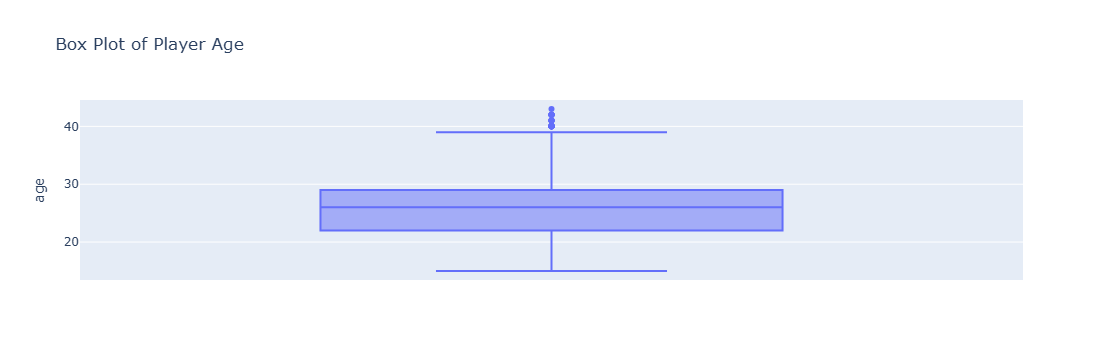

In [271]:
# check outliers
fig = px.box(df, y='age', title="Box Plot of Player Age")

# Show the plot
fig.show() # I will consider 40 as outlier

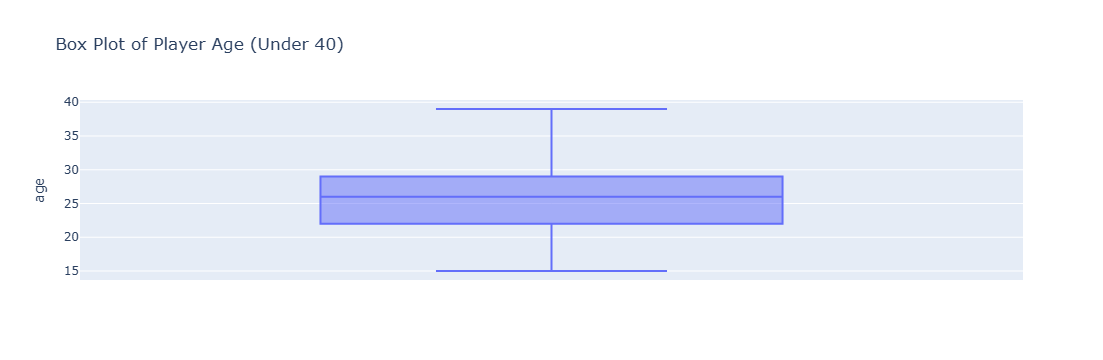

In [272]:
df_filtered = df[df['age'] < 40]

# Create a box plot for the filtered data
fig = px.box(df_filtered, y='age', title="Box Plot of Player Age (Under 40)")

# Show the plot
fig.show()

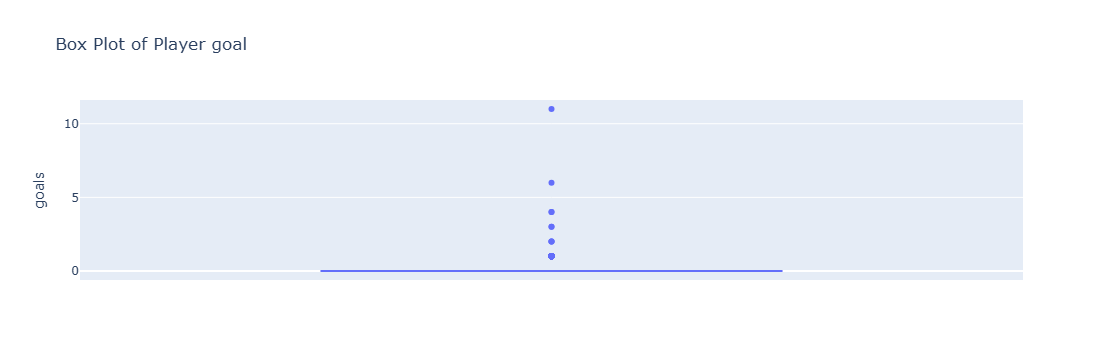

In [273]:
# check outliers
fig = px.box(df, y='goals', title="Box Plot of Player goal")

# Show the plot
fig.show() 

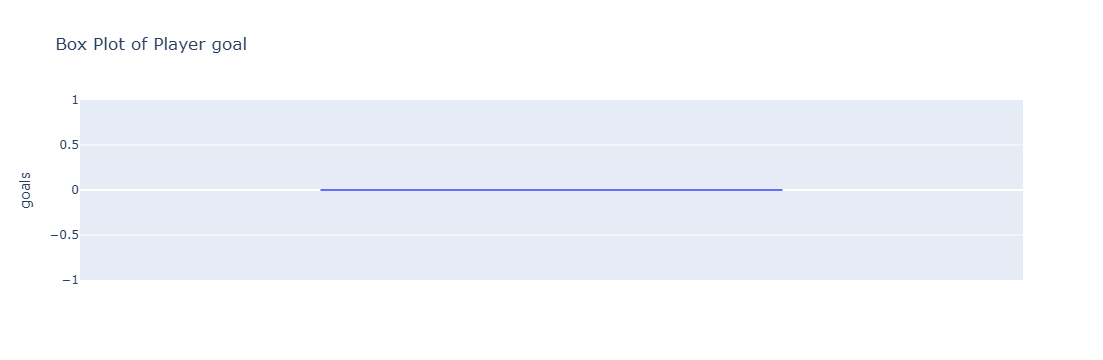

In [274]:
df_filtered = df[df['goals'] <1]

# Create a box plot for the filtered data
fig = px.box(df_filtered, y='goals', title="Box Plot of Player goal ")

# Show the plot
fig.show()

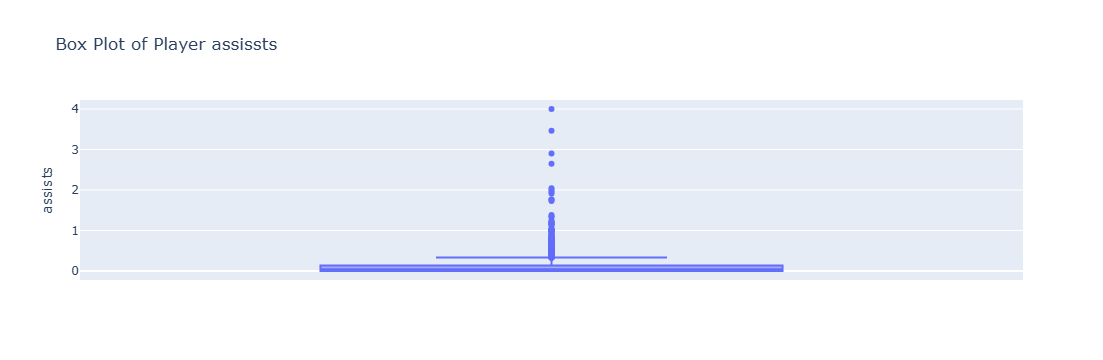

In [275]:
# check outliers
fig = px.box(df, y='assists', title="Box Plot of Player assissts")

# Show the plot
fig.show() 

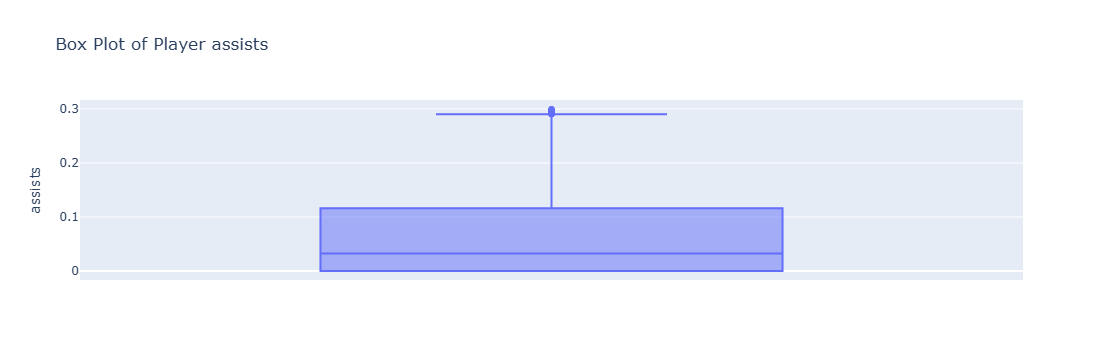

In [276]:
df_filtered = df[df['assists'] <.3]

# Create a box plot for the filtered data
fig = px.box(df_filtered, y='assists', title="Box Plot of Player assists ")

# Show the plot
fig.show()

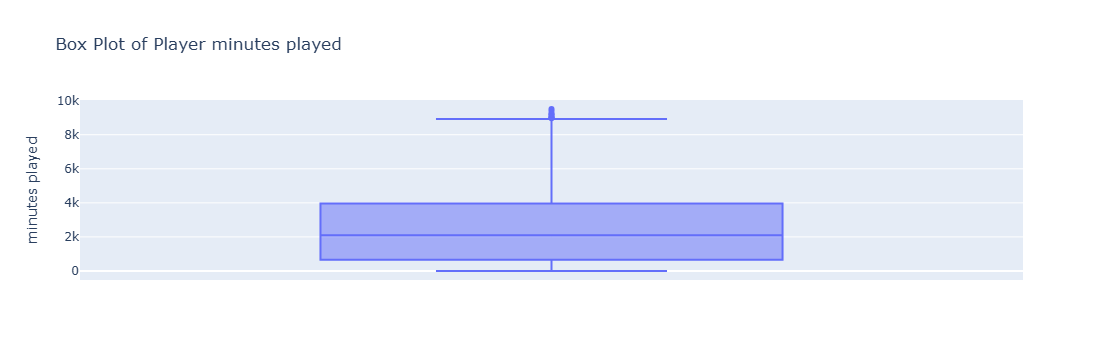

In [277]:
# check outliers
fig = px.box(df, y='minutes played', title="Box Plot of Player minutes played")

# Show the plot
fig.show() 

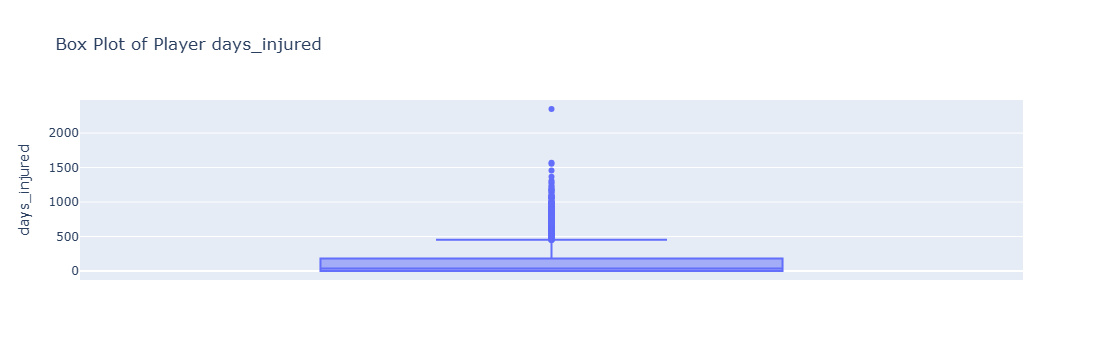

In [278]:
# check outliers
fig = px.box(df, y='days_injured', title="Box Plot of Player days_injured")

# Show the plot
fig.show() 

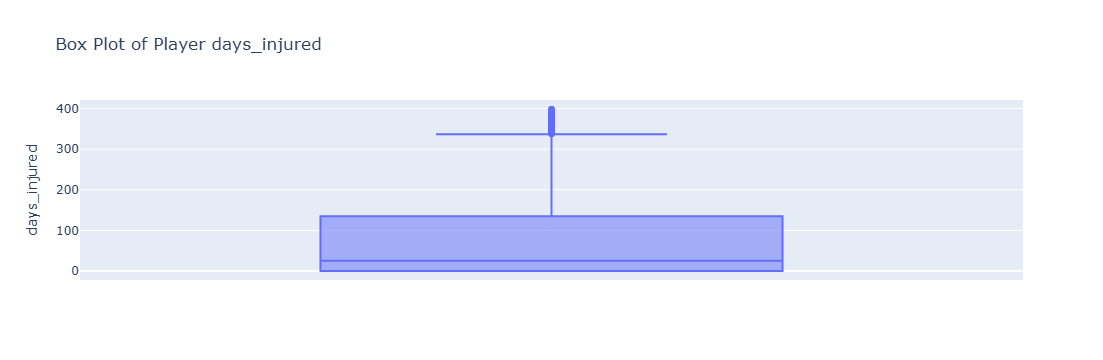

In [279]:
df_filtered = df[df['days_injured'] <400]

# Create a box plot for the filtered data
fig = px.box(df_filtered, y='days_injured', title="Box Plot of Player days_injured ")

# Show the plot
fig.show()

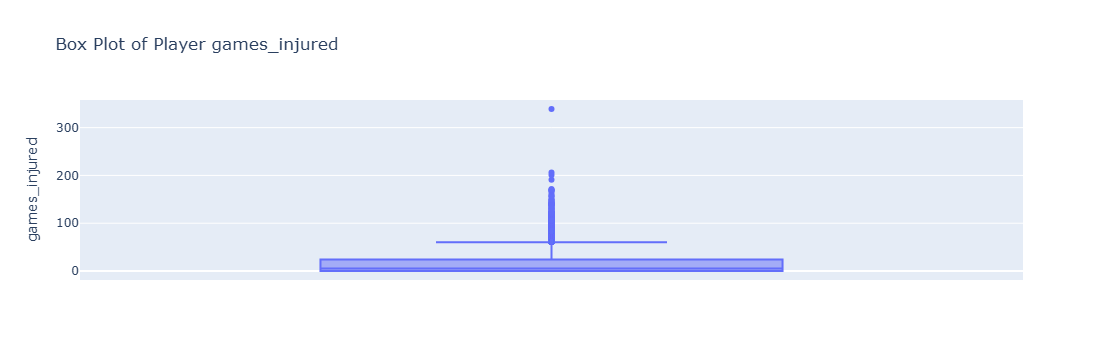

In [280]:
# check outliers
fig = px.box(df, y='games_injured', title="Box Plot of Player games_injured")

# Show the plot
fig.show() 

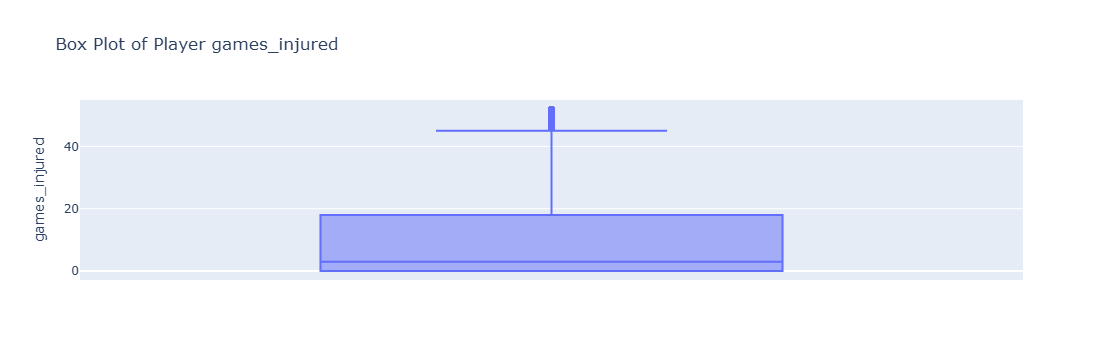

In [281]:
df_filtered = df[df['games_injured'] <53]

# Create a box plot for the filtered data
fig = px.box(df_filtered, y='games_injured', title="Box Plot of Player games_injured ")

# Show the plot
fig.show()

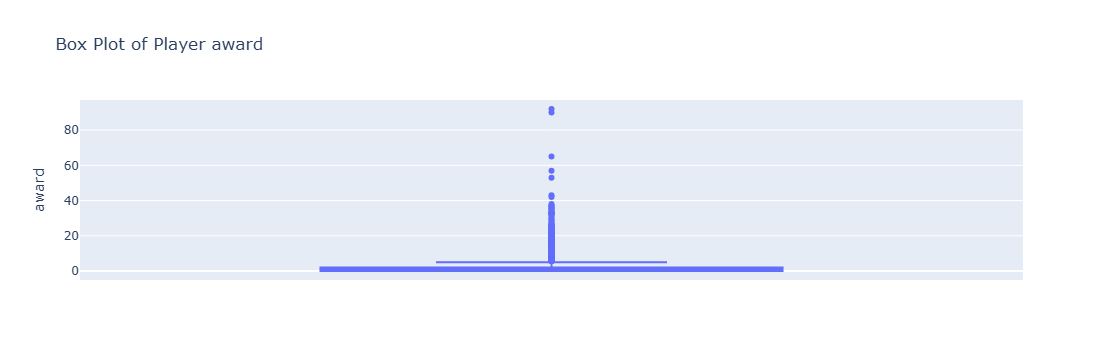

In [282]:
# check outliers
fig = px.box(df, y='award', title="Box Plot of Player award")

# Show the plot
fig.show() 

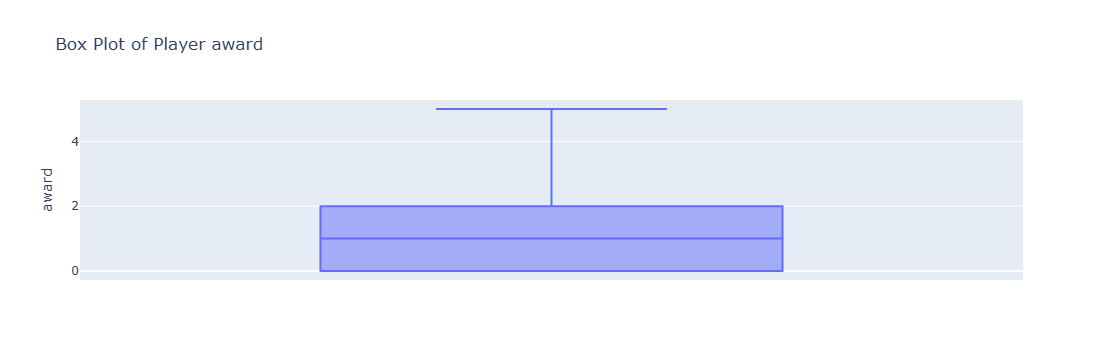

In [283]:
df_filtered = df[df['award'] <6]

# Create a box plot for the filtered data
fig = px.box(df_filtered, y='award', title="Box Plot of Player award ")

# Show the plot
fig.show()

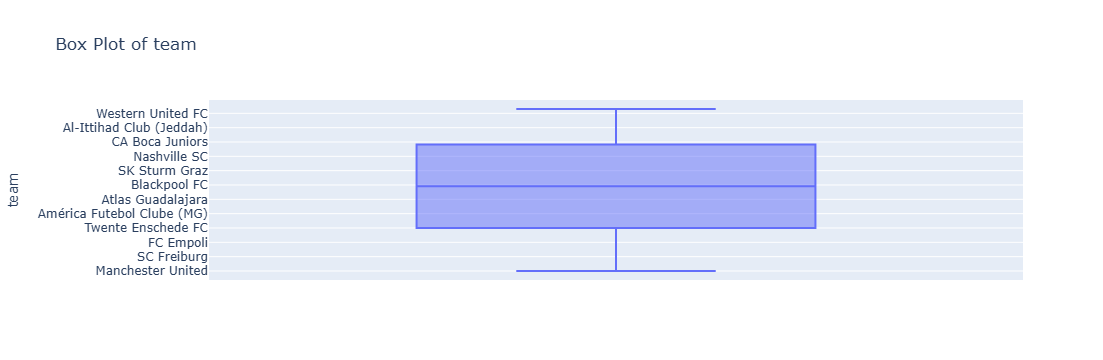

In [284]:
# check outliers
fig = px.box(df, y='team', title="Box Plot of team")

# Show the plot
fig.show() 

### Predicting Current Player Value (current_value) as category values 
#### Dependent Variable: current_value
#### Independent Variables: age, goals, assists, minutes played, days_injured, games_injured, award, team

##### 1. Before we start feeding the model with data , we want to check the selected independent features correlations, and ommit any feature that is highly correlated to another one 

In [287]:
df.columns

Index(['player_id', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player_id            10754 non-null  int32  
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  int32  
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  int32  
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

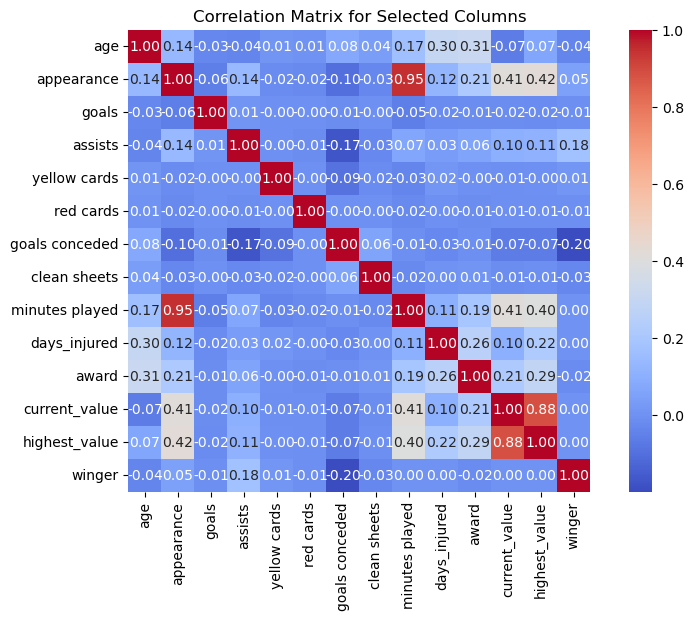

In [289]:
df=df_filtered
# Specify the columns for correlation
columns_of_interest = [ 'age', 'appearance',
       'goals', 'assists', 'yellow cards',  'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'award', 'current_value', 'highest_value',
        'winger']  

# Calculate correlation only for specified columns
correlation_matrix = df[columns_of_interest].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix for Selected Columns')
plt.show()

##### game_injured is highly correlated with days_injured so we will take only one of them 
##### we should considered highe

### -----------------------------------Feature Engneering------------------------------------------------------- 

In [292]:
df_filtered=df_filtered.copy()

# Divide current_value into three quantile-based categories
df_filtered['price_range'] = pd.qcut(df_filtered['current_value'], q=3, labels=['Cheap', 'Moderate', 'High'])



y = df_filtered['price_range']

# Define the independent variables (X) again before scaling
X = df_filtered[['height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'highest_value',
       'position_encoded', 'winger']]



In [293]:
from sklearn.preprocessing import LabelEncoder
# encode the label to 0 and 1 and 2 because we have three classes
encoder = LabelEncoder()
df_filtered['price_range']= encoder.fit_transform(df_filtered['price_range'])  

In [294]:
# in class 0 we have 3569 observations , in class 1 there is 3100 observations , in class 2 there is 3051 observations
# classes are distributed almost evently
df_filtered['price_range'].value_counts()

price_range
0    3569
1    3100
2    3051
Name: count, dtype: int64

In [295]:
# drop id and the  target column 
df_filtered.drop(columns=['current_value','player_id'], inplace=True)

In [296]:
#print the correlations of price range with other columns , Appearance and minutes played looks have the highest ones 
correlation = df_filtered.corr(numeric_only=True)
#print(correlation['Price'].sort_values(ascending=False))
print(correlation['price_range'].sort_values(ascending=False))

price_range            1.000000
appearance             0.259517
minutes played         0.244252
award                  0.149221
games_injured          0.136191
days_injured           0.126917
age                    0.123122
position_encoded       0.095988
assists                0.088274
highest_value          0.084889
winger                 0.044328
yellow cards           0.033719
red cards              0.005644
second yellow cards    0.004734
goals                 -0.024667
clean sheets          -0.027411
height                -0.030583
goals conceded        -0.095391
Name: price_range, dtype: float64


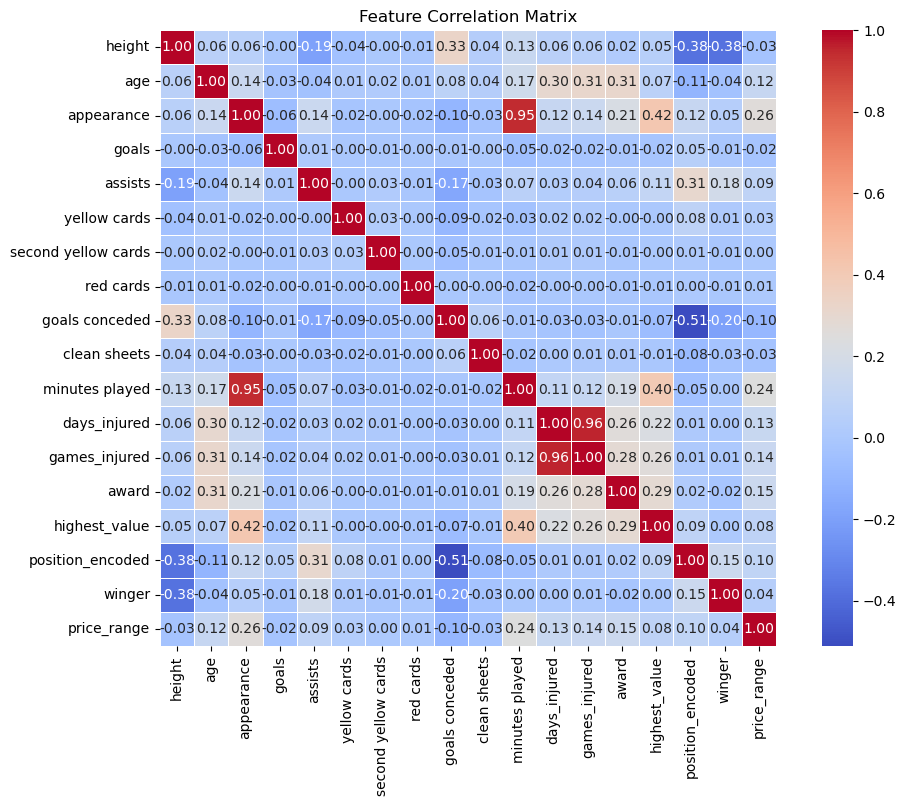

In [297]:


# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

In [298]:
# Set the correlation threshold
threshold = 0.02 # Adjust this threshold as needed

# Filter features with strong correlation with 'price_range_encoded'
selected_features = correlation[abs(correlation['price_range']) > threshold]['price_range'].index
selected_features

Index(['height', 'age', 'appearance', 'goals', 'assists', 'yellow cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'highest_value', 'position_encoded', 'winger',
       'price_range'],
      dtype='object')

In [299]:
selected_features=['age', 'appearance', 'goals', 'assists', 'goals conceded',
       'clean sheets', 'minutes played', 'days_injured', 
       'award', 'highest_value', 'winger']

In [300]:

x = df_filtered[selected_features]
x.head()
y=df_filtered['price_range']

In [301]:
df_filtered.columns

Index(['team', 'name', 'position', 'height', 'age', 'appearance', 'goals',
       'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'highest_value', 'position_encoded', 'winger',
       'price_range'],
      dtype='object')

In [302]:


# Define the dependent (target) variable
y = df_filtered['price_range']

# Define the independent variables (X) again before scaling
X = df_filtered[['age', 
       'goals', 'assists', 'yellow cards',  'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'award', 'highest_value',
        'winger'] + 
               [col for col in df_filtered.columns if 'team_' in col]]

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training independent variables and transform them
X_train_scaled = scaler.fit_transform(X_train)

# Use the same scaler to transform the test set
X_test_scaled = scaler.transform(X_test)

### -----------------------------------Start Random and Decision Tree Forest model-----------------------------------------

In [304]:
# Initializing a Decision Tree Classifier
# This classifier creates a model that makes predictions based on a decision tree structure,
# where each node represents a feature and each branch represents a decision rule.
dt_classifier = DecisionTreeClassifier()


# Initializing a Random Forest Classifier
# This classifier is an ensemble method that combines multiple decision trees to improve prediction accuracy
# and control over-fitting. It uses bagging to train multiple trees on different subsets of the data.
rf_classifier = RandomForestClassifier()

In [305]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [4, 5, 6, 7, 8],   # List of maximum depths to try for the decision trees
    'n_estimators':[35, 40, 50, 60]      # List of numbers of trees to build in the forest
}


# Initialize GridSearchCV to perform cross-validated grid search
# This will systematically test different combinations of parameters specified in param_grid

grid_search = GridSearchCV(
    estimator=rf_classifier,         # The Random Forest classifier to be tuned
    param_grid=param_grid,           # The parameters to be tested
    cv=5,                             # Number of cross-validation folds to use
    scoring='f1_macro',              # The scoring metric to optimize; 'f1_macro' computes the F1 score considering all classes equally
    verbose=1                         # Controls the verbosity of the output; higher values give more detailed messages
)

# The grid search will fit the model multiple times using different combinations of the specified parameters

In [306]:
# Fit the Decision Tree Classifier on the training data
# This step trains the model using the scaled training features (X_train_scaled)
# and the corresponding target labels (y_train). The model learns the patterns
# in the data to make predictions on unseen data later.

dt_classifier.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [307]:
# Fit the Random Forest Classifier on the training data
# This step trains the model using the scaled training features (X_train_scaled)
# and the corresponding target labels (y_train). The model learns to make predictions
# based on the ensemble of decision trees, which helps improve accuracy and reduce overfitting.

rf_classifier.fit(X_train_scaled, y_train)


RandomForestClassifier()

In [308]:
# Fit the GridSearchCV object on the scaled training data
# This step performs a grid search over the specified hyperparameters in param_grid
# by training multiple models on the training set (X_train_scaled) with the target labels (y_train).
# It evaluates each combination of parameters using cross-validation (cv=5) 
# and identifies the best-performing hyperparameter configuration based on the scoring metric (f1_macro).

grid_search.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'n_estimators': [35, 40, 50, 60]},
             scoring='f1_macro', verbose=1)

In [309]:
# Retrieve the best hyperparameter configuration identified by GridSearchCV
# This property returns a dictionary containing the hyperparameters that resulted in the best performance
# during the grid search process. These parameters can be used to optimize the Random Forest model
# for improved predictive performance on unseen data.

grid_search.best_params_

{'max_depth': 8, 'n_estimators': 50}

###### max_depth: 8: This indicates that the optimal maximum depth of the individual decision trees in the Random Forest is 8. A maximum depth of 8 suggests that the trees are sufficiently complex to capture patterns in the data without overfitting excessively.

###### n_estimators: 60: This specifies that the best-performing Random Forest consists of 60 trees. A larger number of trees typically leads to better performance due to the averaging effect, which helps to reduce variance and improve prediction accuracy.

In [311]:
# Retrieve the best model trained during the grid search
# This property returns the estimator (model) that performed best on the validation sets
# according to the scoring metric specified earlier (f1_macro). 
# This model is now ready for making predictions on unseen data.

best_model = grid_search.best_estimator_

In [312]:
# Predict and evaluate the model
y_pred_dt = dt_classifier.predict(X_test_scaled)
y_pred_rf = rf_classifier.predict(X_test_scaled)
y_pred_rf_g = best_model.predict(X_test_scaled)

In [313]:
# Calculate the benchmark model based on the most common price range
# This model serves as a baseline for comparison with more complex models.
# The benchmark is defined as the percentage of the most common price range 
# (identified by value_counts()[1]) relative to the total number of entries 
# in the filtered DataFrame (df_filtered).
# The result is rounded to two decimal places for easier interpretation.

# Calculate the base model percentage
base_model = round(df_filtered['price_range'].value_counts()[1] / df_filtered.shape[0] * 100, 2)

# Output the benchmark model percentage
base_model

31.89

###### The value 31.89 signifies that 31.89% of the dataset belongs to the most frequent price range. This percentage serves as a baseline metric for model performance evaluation.

In [315]:
# Evaluate the Decision Tree model on the training set
# Make predictions using the trained decision tree classifier
y_pred_train_dt = dt_classifier.predict(X_train_scaled)

# Calculate the accuracy of the model on the training data
# accuracy_score compares the true labels (y_train) with the predicted labels (y_pred_train_dt)
# and returns the proportion of correctly predicted instances.
accuracy = accuracy_score(y_train, y_pred_train_dt)

# Output the accuracy score 
accuracy

1.0

######  training accuracy of 1 indicates that the model fits the training data perfectly, it is crucial to validate its performance on unseen data to ensure that it generalizes well.

In [317]:
# Evaluate the Decision Tree model on the test set
# Make predictions using the trained decision tree classifier 
y_pred_dt = dt_classifier.predict(X_test_scaled)

# Calculate the accuracy of the model on the test data
# accuracy_score compares the true labels (y_test) with the predicted labels (y_pred_dt)
# and returns the proportion of correctly predicted instances.
accuracy = accuracy_score(y_test, y_pred_dt)

# Output the accuracy score
accuracy

0.8189300411522634

###### accuracy of 82.30% suggests that the model is performing well, as it successfully classifies a significant majority of the test samples. This is generally considered a strong performance

In [319]:
# Evaluate the Random Forest model on the training set
# Make predictions using the trained Random Forest classifier 
y_pred_train_rf = rf_classifier.predict(X_train_scaled)

# Calculate the accuracy of the model on the training data
# accuracy_score compares the true labels (y_train) with the predicted labels (y_pred_train_rf)
# and returns the proportion of correctly predicted instances.
accuracy = accuracy_score(y_train, y_pred_train_rf)

# Output the accuracy score 
accuracy

1.0

###### accuracy of 1 (or 100%) for your Random Forest model on the training set indicates that the model perfectly predicted all instances in the training data.

In [321]:
# Evaluate the Random Forest model on the test set
# Make predictions using the trained Random Forest classifier 
y_pred_rf = rf_classifier.predict(X_test_scaled)

# Calculate the accuracy of the model on the test data
# accuracy_score compares the true labels (y_test) with the predicted labels (y_pred_rf)
# and returns the proportion of correctly predicted instances.
accuracy = accuracy_score(y_test, y_pred_rf)

# Output the accuracy score 
accuracy


0.8719135802469136

###### accuracy of approximately 0.868 (or 86.83%) on your test set indicates that your Random Forest model correctly predicted the target variable for about 86.83% of the instances. 

In [323]:
# Evaluate the best Random Forest model on the training set
# Use the best model obtained from GridSearchCV to make predictions on the scaled training features (X_train_scaled)
y_pred_train_rf_g = best_model.predict(X_train_scaled)

# Calculate the accuracy of the best model on the training data
# accuracy_score compares the true labels (y_train) with the predicted labels (y_pred_train_rf_g)
# and returns the proportion of correctly predicted instances.
accuracy = accuracy_score(y_train, y_pred_train_rf_g)

# Output the accuracy score of the best Random Forest model on the training set
accuracy

0.8867026748971193

###### accuracy of approximately 0.889 (or 88.90%) for your best Random Forest model on the training set indicates that the model correctly predicted the target variable for about 88.90% of the instances in the training data.

In [325]:
# Evaluate the best Random Forest model on the test set
# Use the best model obtained from GridSearchCV to make predictions on the scaled test features (X_test_scaled)
y_pred_rf_g = best_model.predict(X_test_scaled)

# Calculate the accuracy of the best model on the test data
# accuracy_score compares the true labels (y_test) with the predicted labels (y_pred_rf_g)
# and returns the proportion of correctly predicted instances.
accuracy = accuracy_score(y_test, y_pred_rf_g)
accuracy

0.867798353909465

######  accuracy of approximately 0.869 (or 86.93%) for your best Random Forest model on the test set indicates that the model correctly predicted the target variable for about 86.93% of the instances in the test data. 

In [327]:
# Calculate the confusion matrix by comparing the true labels (y_test) with the predicted labels (y_pred_rf_g)
conf_matrix = confusion_matrix(y_test, y_pred_rf_g)

# Output the confusion matrix
conf_matrix  # This will display the confusion matrix, showing counts of true positive, true negative, false positive, and false negative predictions.

array([[588,   7, 120],
       [  2, 606,  24],
       [ 17,  87, 493]], dtype=int64)

##### ---------------------------------------------Interpretation of Values------------------------------------------
###### True Negatives (TN):

###### Class 0: 590 instances were correctly predicted as Class 0.
###### Class 1: 607 instances were correctly predicted as Class 1.
###### Class 2: 493 instances were correctly predicted as Class 2.
###### False Positives (FP):

###### Class 0: 4 instances were incorrectly predicted as Class 0 (actual Class 1 or Class 2).
###### Class 1: 0 instances were incorrectly predicted as Class 1.
###### Class 2: 22 instances were incorrectly predicted as Class 2.
###### False Negatives (FN):

###### Class 0: 121 instances of Class 2 were incorrectly predicted as Class 0.
###### Class 1: 25 instances of Class 2 were incorrectly predicted as Class 1.
###### Class 2: 82 instances of Class 1 were incorrectly predicted as Class 2.
###### Overall Analysis
###### High Accuracy: The model performed well for Class 1, with a high number of true positives (607) and no false positives. However, it struggles with Class 0 and Class 2, as seen in the higher false positive and false negative counts.



In [329]:
# Print the classification report for the training set predictions
print("Train classification report for best rf:")
# The classification report provides metrics such as precision, recall, and F1-score.
print(f'{classification_report(y_train, y_pred_train_rf_g, labels=list(best_model.classes_))}')

# Print the classification report for the test set predictions
print("Test classification report for best rf:")
# Similar to the training report, this one evaluates model performance on the test data.
# It compares the true labels (y_test) with the predicted labels (y_pred_rf_g) for the test data.
print(f'{classification_report(y_test, y_pred_rf_g, labels=list(best_model.classes_))}')

Train classification report for best rf:
              precision    recall  f1-score   support

           0       0.99      0.84      0.91      2854
           1       0.86      0.98      0.92      2468
           2       0.82      0.84      0.83      2454

    accuracy                           0.89      7776
   macro avg       0.89      0.89      0.89      7776
weighted avg       0.89      0.89      0.89      7776

Test classification report for best rf:
              precision    recall  f1-score   support

           0       0.97      0.82      0.89       715
           1       0.87      0.96      0.91       632
           2       0.77      0.83      0.80       597

    accuracy                           0.87      1944
   macro avg       0.87      0.87      0.87      1944
weighted avg       0.88      0.87      0.87      1944



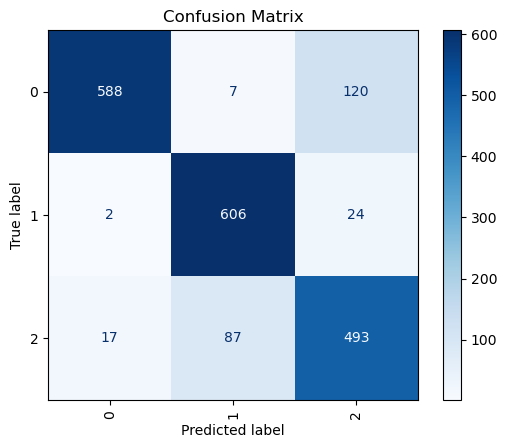

In [330]:
# print the confusion matrix ,the digonal represent the corrected classified instances 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf_g,
                                        display_labels=best_model.classes_,
                                        cmap="Blues",
                                        xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

In [331]:
# Calculate Precision
# Calculate the precision score for the model's predictions on the test set
# Precision is the ratio of true positive predictions to the total predicted positives,
# indicating how many of the positive predictions are actually correct.
# 'average="macro"' calculates precision for each class independently, then averages them,
# providing an overall measure of model precision across all classes.

precision = precision_score(y_test, y_pred_rf_g, average='macro')

# Print the precision score, formatted to two decimal places for readability
print(f"Precision: {precision:.2f}")

Precision: 0.87


######  87% means that, on average, 87% of the instances predicted as positive across all classes were correctly classified.

In [333]:
# Calculate Recall
# Calculate the recall score for the model's predictions on the test set
# Recall is the ratio of true positive predictions to the actual positives,
# indicating how many of the actual positives the model successfully identified.
# 'average="macro"' calculates recall for each class independently and averages them,
# providing an overall measure of model recall across all classes.

recall = recall_score(y_test, y_pred_rf_g, average='macro')

# Print the recall score, formatted to two decimal places for readability
print(f"Recall: {recall:.2f}")

Recall: 0.87


###### 87% indicates that, on average, your model correctly identified 87% of the actual positive cases across all classes. This high recall score, combined with the previously calculated precision of 0.87, suggests that your model has a balanced ability to detect true positives without producing excessive false negatives.

In [335]:
# Calculate F1 Score

# Calculate the F1 score for the model's predictions on the test set
# The F1 score is the harmonic mean of precision and recall, providing a single measure
# of model performance that balances both precision and recall.
# 'average="macro"' calculates the F1 score for each class independently and then averages them,
# giving an overall measure of the model's balanced performance across all classes.
f1 = f1_score(y_test, y_pred_rf_g, average='macro')

# Print the F1 score, formatted to two decimal places for readability
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.87


###### The F1 score combines precision and recall into a single metric, especially useful when both are important to consider together. In our case, with similar precision and recall values, the F1 score will likely also be around 0.87, confirming the model’s balanced performance.

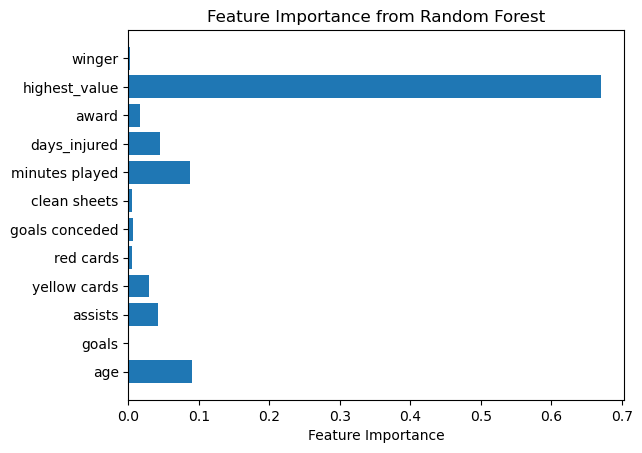

In [337]:
# Retrieve the feature importances from the best random forest model
# feature_importances_ gives the relative importance of each feature in making predictions.
feature_importances = best_model.feature_importances_

# Create a horizontal bar plot to visualize feature importance
# X.columns lists all feature names, and feature_importances contains their importance values.
# This plot identify which features contribute most to the model's predictions.
plt.barh(X.columns, feature_importances)

# Label the x-axis to indicate it represents feature importance values
plt.xlabel('Feature Importance')

# Add a title to provide context for the plot
plt.title('Feature Importance from Random Forest')

# Display the plot
plt.show()

###### Highest value a far way features from others in importance , then age and miniutes played

### -----------------------------------------Prepare the model for production------------------------------------------

#####  Step 1: set up the Function of predection in our Model

In [341]:
import gradio as gr

###### Using Gradio to Interact with Your Model

In [343]:
# Define the mapping from numeric labels to categorical values
label_mapping = {0: "Low Price", 1: "Moderate Price", 2: "High Price"}

# Prediction function with categorical output
def predict_price_range(age, goals, assists, yellow_cards, red_cards, goals_conceded, 
                        clean_sheets, minutes_played, days_injured, award, highest_value, winger, *team_features):
    # Combine all inputs into a single list
    input_data = [
        age, goals, assists, yellow_cards, red_cards, goals_conceded,
        clean_sheets, minutes_played, days_injured, award, highest_value, winger
    ] + list(team_features)
    
    # Convert input data to a DataFrame with the correct column names
    input_df = pd.DataFrame([input_data], columns=X.columns)
    
    # Scale the input data using the fitted scaler
    input_df_scaled = scaler.transform(input_df)
    
    # Make the prediction with the model
    prediction = best_model.predict(input_df_scaled)
    
    # Map the numeric prediction to its categorical equivalent
    prediction_category = label_mapping[prediction[0]]
    
    return f"Predicted Price Range: {prediction_category}"

In [ ]:
# Gradio Interface Setup

# Define the input components for the Gradio interface.
# Each component corresponds to a player statistic feature, such as age, goals, assists, etc.
# The 'label' parameter specifies the label for each input field displayed in the interface.

inputs = [
    gr.Number(label="Age"),                  # Numeric input for the player's age
    gr.Number(label="Goals"),                # Numeric input for the player's goals scored
    gr.Number(label="Assists"),              # Numeric input for the player's assists
    gr.Number(label="Yellow Cards"),         # Numeric input for yellow cards received
    gr.Number(label="Red Cards"),            # Numeric input for red cards received
    gr.Number(label="Goals Conceded"),       # Numeric input for goals conceded
    gr.Number(label="Clean Sheets"),         # Numeric input for clean sheets
    gr.Number(label="Minutes Played"),       # Numeric input for minutes played
    gr.Number(label="Days Injured"),         # Numeric input for days injured
    gr.Number(label="Award"),                # Numeric input for awards received
    gr.Number(label="Highest Value"),        # Numeric input for the highest value of the player
    gr.Checkbox(label="Winger")              # Checkbox to indicate if the player is a winger
] + [gr.Checkbox(label=col) for col in X.columns if 'team_' in col] # Add checkboxes for team-related columns

# Define the output component as a text box, where the model's prediction will be displayed.
output = gr.Textbox(label="Predicted Price Range")

# Set up the Gradio interface with the prediction function, inputs, and output.
# - 'fn' is the function that makes the prediction based on input data.
# - 'inputs' is a list of input components (defined above).
# - 'outputs' is the output component where results will appear.
# - 'title' provides a title for the Gradio app.
# - 'description' provides a short explanation of the app's purpose.

interface = gr.Interface(
    fn=predict_price_range,
    inputs=inputs,
    outputs=output,
    title="Player Price Range Prediction [ Low or Moderate or High ]",
    description="Predicts the price range based on player stats."
)

# Launch the Gradio interface, starting the app and allowing user interaction.
interface.launch()


In [344]:
# Gradio Interface Setup
inputs = [
    gr.Number(label="Age"),
    gr.Number(label="Goals"),
    gr.Number(label="Assists"),
    gr.Number(label="Yellow Cards"),
    gr.Number(label="Red Cards"),
    gr.Number(label="Goals Conceded"),
    gr.Number(label="Clean Sheets"),
    gr.Number(label="Minutes Played"),
    gr.Number(label="Days Injured"),
    gr.Number(label="Award"),
    gr.Number(label="Highest Value"),
    gr.Checkbox(label="Winger")
] + [gr.Checkbox(label=col) for col in X.columns if 'team_' in col]

output = gr.Textbox(label="Predicted Price Range")

interface = gr.Interface(
    fn=predict_price_range,
    inputs=inputs,
    outputs=output,
    title="Player Price Range Prediction",
    description="Predicts the price range based on player stats."
)

interface.launch()

* Running on local URL:  http://127.0.0.1:7863

To create a public link, set `share=True` in `launch()`.
